In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_read=pd.read_csv("spam_or_not_spam.csv")
data_read.head()  #Spam -1 Non Spam-0

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
data_read['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [5]:
data_read=data_read.dropna(inplace=False)

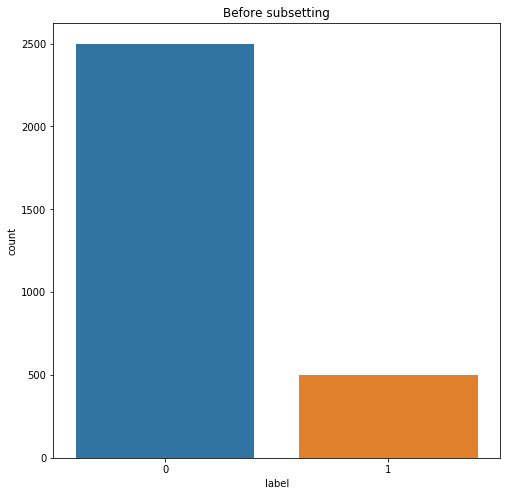

In [7]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot(x=data_read['label'],data=data_read)
plt.title('Before subsetting')
plt.show()

In [10]:
# Shuffle the Dataset.
shuffled_df = data_read.sample(frac=1,random_state=4)

# Put all the spam class in a separate dataset.
spam = shuffled_df.loc[shuffled_df['label'] == 1]

#Randomly select 500 observations from the non-spam (majority class)
non_spam = shuffled_df.loc[shuffled_df['label'] == 0].sample(n=499,random_state=42)
normalized_df = pd.concat([spam, non_spam])
normalized_df['label'].value_counts()

1    499
0    499
Name: label, dtype: int64

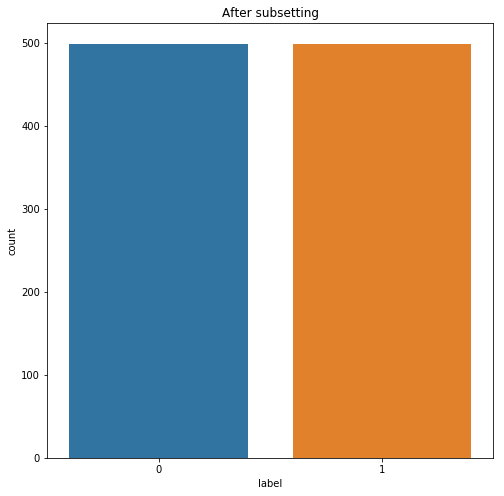

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot(x=normalized_df['label'],data=normalized_df)
plt.title('After subsetting')
plt.show()

In [14]:
normalized_df.head()

,email,label
2989,social on january NUMBERst NUMBER the europea...,1
2908,freedombuilder advertising services can put yo...,1
2997,thank you for shopping with us gifts for all ...,1
2597,NUMBER join the web s hottest fastest growing ...,1
2757,newsletter coach invest septembre NUMBER coach...,1


In [ ]:
####DATA CLEANING#########

In [10]:
### Normalization  
#### 1.Case Normalization
#### 2.Remove stop words
#### 3. Remove punctuation special symbols
#### 3. Lemmetizing /stemming



In [13]:
from nltk.corpus import stopwords
from nltk import stem
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

def data_clean(mail):
    mail=str(mail)
    mail=mail.lower()
    mail=[w for w in mail.split() if w not in stopwords]
    mail=" ".join([stemmer.stem(w) for w in mail])
    return mail
    
# data_clean(data_read['email'])

In [ ]:
### Tokenize the word into no

In [15]:
from sklearn.model_selection import train_test_split
# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(normalized_df['email'], normalized_df['label'], test_size = 0.3, random_state = 1)

vect = TfidfVectorizer()
X_train_vect = vect.fit_transform(X_train)


In [ ]:
###Building Model
###1.SVM classifier

In [17]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train_vect, y_train)

C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
from sklearn.metrics import confusion_matrix
X_test_vect = vect.transform(X_test)
y_pred = svm.predict(X_test_vect)
print(confusion_matrix(y_test, y_pred))

[[152   1]
 [ 21 126]]


In [28]:
from sklearn.metrics import accuracy_score
print("SVC scores:\n")
print(accuracy_score(y_test, y_pred)) #0.9894644424934153
print(accuracy_score(y_test, y_pred,normalize=False)) #1129 out of 1139

SVC scores:

0.96
288


In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
X_test_vect = vect.transform(X_test)
y_pred = classifier.predict(X_test_vect)
print(confusion_matrix(y_test, y_pred))

[[145   8]
 [  4 143]]


In [29]:
print("Naive Bayes score:\n")
print(accuracy_score(y_test, y_pred)) #0.9894644424934153
print(accuracy_score(y_test, y_pred,normalize=False)) #1129 out of 1139

Naive Bayes score:

0.96
288
